<a href="https://colab.research.google.com/github/byhaqii/Machine-Learning-2025/blob/main/QUIZ1_23417200225_MUHAMMAD%20RIZAL%20AL%20BAIHAQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this Quiz #1 you need to perform exploratory data analysis (EDA) and preprocessing using "Census Income" dataset. The dataset is tabular data which has several missing value in some variables. Moreover, you may need to adjust the name of variables (if needed).

To guide you through this task, some code has beed provided including, download the data, loading the data, and metadata inspection.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Part 1 - Data Loading dan Data Imputation

## Task 1 (5 points)
1.   Do inspection to get the information about dataset
2.   **Which variable(s)** has **missing values**? **How many is it**?



In [7]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

# Inspect the dataset information
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per variable:")
print(missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB

Missing values per variable:
workclass         963
occupation        966
native-country    2

## Task 2 (5 points)
1. Perform data imputation on missing values.
2. Verified the missing values for each variable. Is it still there?

In [8]:
# Answer task 2 using this cell
# You can add another cell after this cell if needed

# Impute missing values with the mode
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify that missing values are gone
print("Missing values after imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Missing values after imputation:
Series([], dtype: int64)


/tmp/ipython-input-1263929628.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


## Task 3 (10 points)
Do inspection to all the quantitative variables (features). If you found an **inappropriate value(s)**, replace it with '**Others**'. Also, if you found any typos value(s), **fix the typos**.

In [9]:
# Answer task 3 using this cell
# You can add another cell after this cell if needed

# Identify quantitative variables
quantitative_vars = df.select_dtypes(include=np.number).columns
print("Quantitative variables:", quantitative_vars)

# Inspect unique values for each quantitative variable
for col in quantitative_vars:
    print(f"\nInspecting '{col}':")
    display(df[col].value_counts().sort_index())

Quantitative variables: Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Inspecting 'age':


,count
age,
17,595
18,862
19,1053
20,1113
21,1096
...,...
86,1
87,3
88,6



Inspecting 'fnlwgt':


,count
fnlwgt,
12285,1
13492,1
13769,3
13862,1
14878,1
...,...
1268339,1
1366120,1
1455435,1



Inspecting 'education-num':


,count
education-num,
1,83
2,247
3,509
4,955
5,756
6,1389
7,1812
8,657
9,15784



Inspecting 'capital-gain':


,count
capital-gain,
0,44807
114,8
401,5
594,52
914,10
...,...
25236,14
27828,58
34095,6



Inspecting 'capital-loss':


,count
capital-loss,
0,46560
155,1
213,5
323,5
419,3
...,...
3175,2
3683,2
3770,4



Inspecting 'hours-per-week':


,count
hours-per-week,
1,27
2,53
3,59
4,84
5,95
...,...
95,2
96,9
97,2


# Part 2 - Visual Inspection



## Task 1 - Data Visualization (20 points)
Do inspection on this following variabels,
1. On the 'age' by using a histogram
2. On the 'education' using a barchart
3. On the 'income' to 'hours_per_week' by using a boxplot (grouped by income)
4. On the 'age' to 'capital-gain' and 'capital-loss' using lineplot (lineplot with multiple x-data)

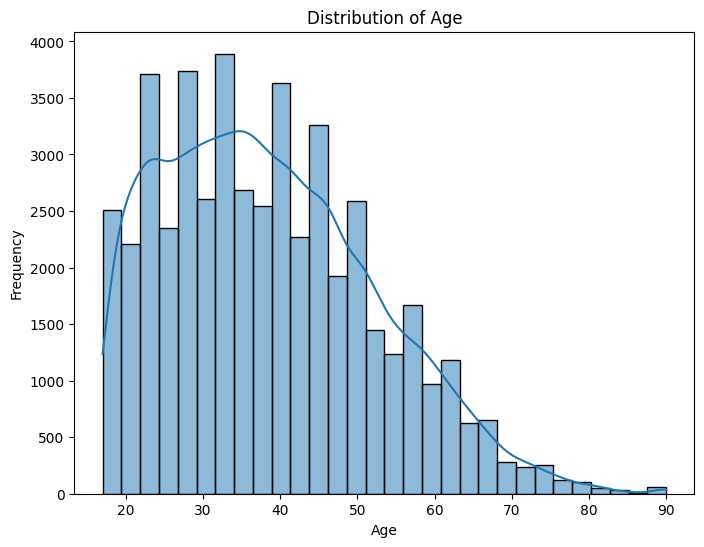

In [10]:
# Answer 1.1 - Histrogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-1430654957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='education', order=df['education'].value_counts().index, palette='viridis') # Changed y to x for vertical, added palette


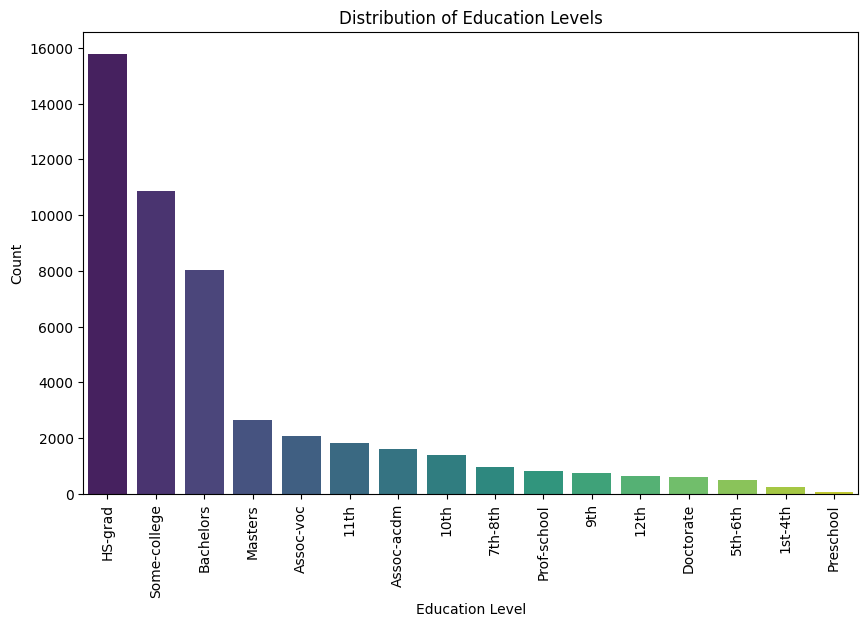

In [12]:
# Answer 1.2 - Barchart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, palette='viridis') # Changed y to x for vertical, added palette
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level') # Changed label
plt.ylabel('Count') # Changed label
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

/tmp/ipython-input-2528083388.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income', y='hours-per-week', palette='viridis')


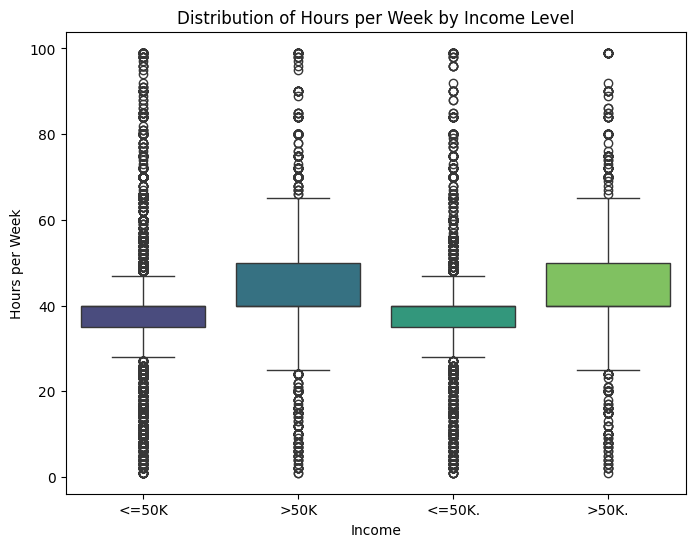

In [13]:
# Answer 1.3 - Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='income', y='hours-per-week', palette='viridis')
plt.title('Distribution of Hours per Week by Income Level')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

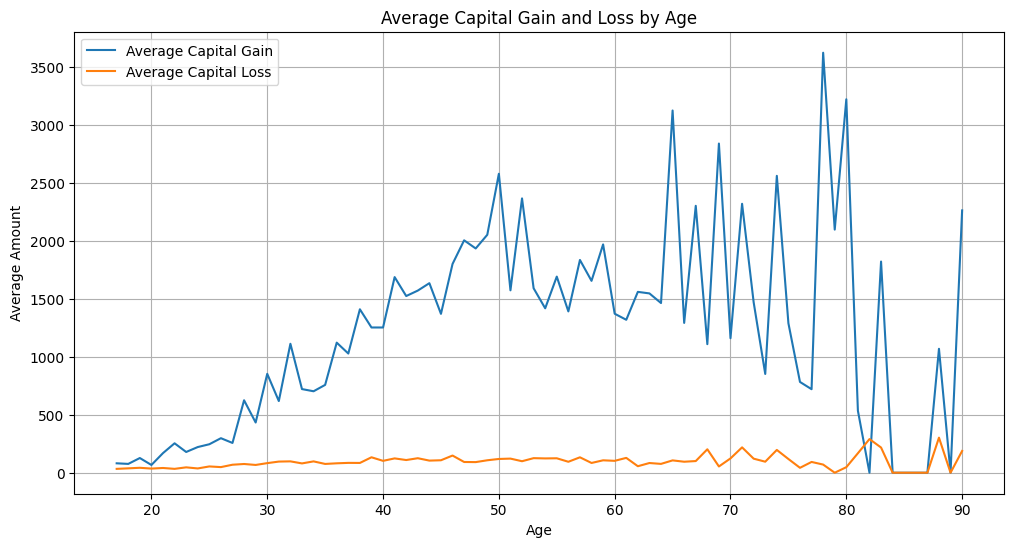

In [14]:
# Answer 1.4 - Lineplot

# Group by age and calculate the mean of capital-gain and capital-loss
age_capital_trends = df.groupby('age')[['capital-gain', 'capital-loss']].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(age_capital_trends['age'], age_capital_trends['capital-gain'], label='Average Capital Gain')
plt.plot(age_capital_trends['age'], age_capital_trends['capital-loss'], label='Average Capital Loss')
plt.title('Average Capital Gain and Loss by Age')
plt.xlabel('Age')
plt.ylabel('Average Amount')
plt.legend()
plt.grid(True)
plt.show()

## Task 2 - Visual Analysis (15 points)
1. What kind of distribution showed in 'age'?
2. If you find missing values in 'age', what kind of data impute method will you use? Why?
3. How many outliner for each category (group) in 'income' related to 'hour-per-week'? Which category has more outlier?

In [16]:
# Answer with python comment like this -> inline comment

'''
  Or by using multiple
  line comments like this
'''

# Answer 1: What kind of distribution showed in 'age'?
# Based on the histogram of 'age', the distribution appears to be right-skewed.
# There is a peak in the late 20s to early 40s, with the frequency decreasing as age increases.

# Answer 2: If you find missing values in 'age', what kind of data impute method will you use? Why?
# If there were missing values in 'age', I would likely use the median for imputation.
# This is because 'age' is a continuous variable with a skewed distribution, and the median is less sensitive to outliers compared to the mean.

# Answer 3: How many outliner for each category (group) in 'income' related to 'hour-per-week'? Which category has more outlier?
# To determine the exact number of outliers for each income category in 'hours-per-week', we would need to calculate the IQR and identify values outside 1.5 * IQR from the quartiles.
# However, visually inspecting the boxplot for 'hours-per-week' by 'income', both income categories (<=50K and >50K) appear to have a significant number of outliers represented by the individual points beyond the whiskers.
# It's difficult to definitively say which category has *more* outliers just by visual inspection without counting them, but both show many data points outside the main box and whiskers.

'\n  Or by using multiple\n  line comments like this\n'

# Part 3 - Encoding in Categorical Variable

## Task 1 (5 points)
Do encoding process on 'Sex' and 'Income', while 'Income' is target variable.

In [17]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

# Encode 'Sex' (binary: Male/Female)
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Encode 'Income' (target variable, binary: <=50K/>50K)
# Note: Based on the metadata, the target variable values are '>50K' and '<=50K'.
# Let's check the unique values in the dataframe's income column to be sure.
print("Unique values in 'income' column before encoding:", df['income'].unique())

# Assuming the unique values are consistent with the metadata or the head() output,
# we will map '>50K' to 1 and '<=50K' to 0.
# We also need to handle potential variations like trailing periods if they exist.
df['income'] = df['income'].replace(['>50K.', '<=50K.'], ['>50K', '<=50K'])
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})

print("Unique values in 'income' column after encoding:", df['income'].unique())

Unique values in 'income' column before encoding: ['<=50K' '>50K' '<=50K.' '>50K.']
Unique values in 'income' column after encoding: [0 1]


# Part 4 - Correlation Analysis

## Task 1 (10 points)
1. Do correlation analysis on the following variabels: 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', and 'income' (encoded version from previous task)
2. Based on the result, what kind of information you get?

,age,education-num,hours-per-week,capital-gain,capital-loss,income
age,1.000000,0.030940,0.071558,0.077229,0.056944,0.230369
education-num,0.030940,1.000000,0.143689,0.125146,0.080972,0.332613
hours-per-week,0.071558,0.143689,1.000000,0.082157,0.054467,0.227687
capital-gain,0.077229,0.125146,0.082157,1.000000,-0.031441,0.223013
capital-loss,0.056944,0.080972,0.054467,-0.031441,1.000000,0.147554
income,0.230369,0.332613,0.227687,0.223013,0.147554,1.000000


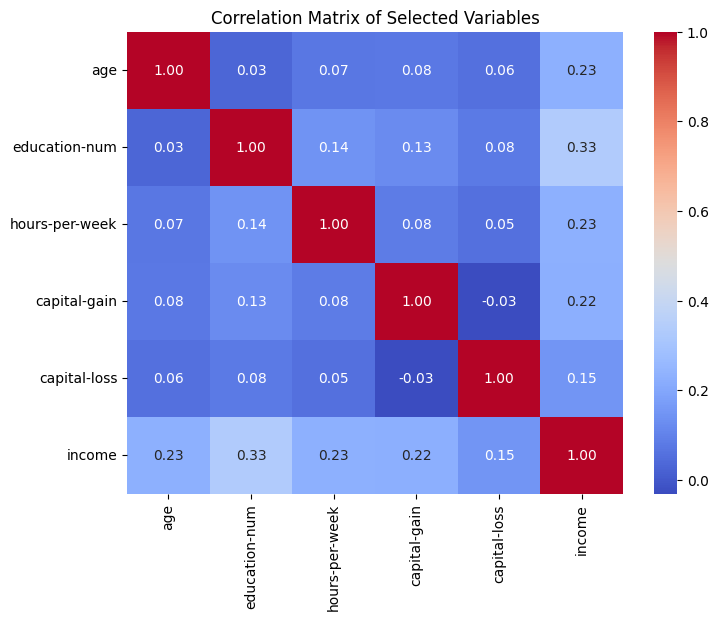

In [18]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

# Select the variables for correlation analysis
correlation_vars = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
correlation_matrix = df[correlation_vars].corr()

# Display the correlation matrix
display(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()

In [19]:
# Answer task 2 using this cell -> you can use multiple comments style too

# Answer 2: Based on the result, what kind of information you get?
# The correlation matrix and heatmap show the pairwise correlation coefficients between the selected variables.
# The values range from -1 to 1.
# - A value close to 1 indicates a strong positive linear correlation (as one variable increases, the other tends to increase).
# - A value close to -1 indicates a strong negative linear correlation (as one variable increases, the other tends to decrease).
# - A value close to 0 indicates a weak or no linear correlation.

# From the results:
# - 'income' has the strongest positive correlation with 'education-num' (0.33), indicating that higher education levels are associated with higher income.
# - 'income' also has positive correlations with 'age' (0.23), 'hours-per-week' (0.23), and 'capital-gain' (0.22).
# - 'capital-loss' has a weaker positive correlation with 'income' (0.15).
# - 'capital-gain' and 'capital-loss' have a weak negative correlation (-0.03), which is expected as they represent gains and losses.
# - Other correlations between the independent variables are relatively weak, suggesting limited multicollinearity among these specific features.

# Part 5 - Preprocessing on MNIST Dataset

In this part, you need to perform EDA and simple preprocessing on MNIST dataset. This dataset contain images of handwritten digit from 0 to 9. A pre configuration is provided to help you to load the data and inspect some images.

Hints:
1. You only need to use the **Test** set.
2. You need to perform to all of images in test set (10k images). You may need a function to complete this task (optional).

In [20]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


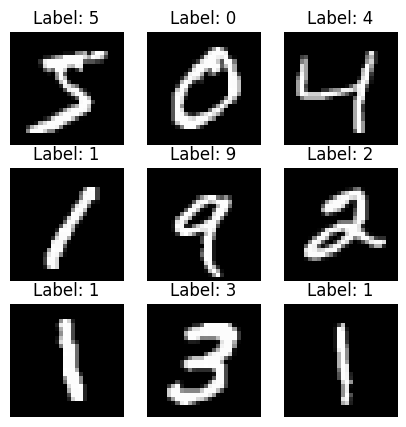

In [22]:
# Visual Inspection
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Task 1 (10 points)
1. Perform **upsampling** on the images to 32x32
2. Show the 5 sample of the result.


Hint: You need to store the result in an empty array. Replacing data to the  **X_test** cannot be done due to the shape of the array (10000, (28,28)). You need to create an array which match with the size of the new images.

Shape of upsampled test data: (10000, 32, 32)


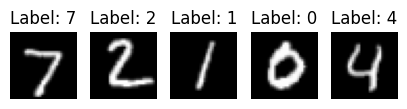

In [23]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

import tensorflow as tf

# Perform upsampling on the test images to 32x32
# The images are currently 28x28
upsampled_X_test = tf.image.resize(X_test[..., tf.newaxis], (32, 32)).numpy()

# Remove the added channel dimension if not needed for subsequent steps
upsampled_X_test = upsampled_X_test.squeeze()

# Print the shape of the upsampled data to verify
print("Shape of upsampled test data:", upsampled_X_test.shape)

# Show 5 sample of the result (visual inspection)
plt.figure(figsize=(5,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(upsampled_X_test[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Task 2 (10 points)
Perform normalization, so the pixel value will have a value in range of 0 until 1

In [24]:
# Answer task 2 using this cell
# You can add another cell after this cell if needed

# Perform normalization
# Pixel values are typically from 0 to 255. Divide by 255 to normalize to [0, 1].
normalized_X_test = upsampled_X_test / 255.0

# Print the shape and check the value range of the normalized data to verify
print("Shape of normalized test data:", normalized_X_test.shape)
print("Min pixel value:", normalized_X_test.min())
print("Max pixel value:", normalized_X_test.max())

Shape of normalized test data: (10000, 32, 32)
Min pixel value: 0.0
Max pixel value: 1.0


## Task 3 (10 points)
Transform / reshape the images into 1 dimensional array. Do it to the all images (after resizing and normalization).

Hint: You may need an empty array to store the result

In [25]:
# Answer task 3 using this cell
# You can add another cell after this cell if needed

# Transform/reshape the images into a 1-dimensional array
# The current shape is (num_images, height, width) -> (10000, 32, 32)
# We want to reshape each image into a 1D array of size height * width (32 * 32 = 1024)
# The new shape will be (num_images, height * width) -> (10000, 1024)

reshaped_X_test = normalized_X_test.reshape(normalized_X_test.shape[0], -1)

# Print the shape of the reshaped data to verify
print("Shape of reshaped test data:", reshaped_X_test.shape)

Shape of reshaped test data: (10000, 1024)
